# Roteiro

1. Escolha uma classe de modelo importando do Scikit.
2. Escolha os hiperparâmetros do modelo instanciando a classe escolhida em 1.
3. Organize os dados em uma *feature matrix* e um *target array*.
4. Ajuste o modelo invocando o método **fit()**.
5. Aplique o modelo aos novos dados usando **predict()**.

In [7]:
import seaborn as sns
development = sns.load_dataset('development.csv')
development.head()

,Population,Area (sq. mi.),Pop. Density,GDP ($ per capita),Literacy (%),Infant mortality,Index
0,9944201,1284000,7.7,1200,47.5,93.82,2
1,5450661,43094,126.5,31100,100.0,4.56,4
2,26783383,437072,61.3,1500,40.4,50.25,2
3,9439,102,92.5,3400,97.0,7.35,4
4,3431932,176220,19.5,12800,98.0,11.95,3


## Regressão Logística

In [0]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [0]:
# 3.1 Feature Matrix
X_development = development.loc[: ,  ["Population", "Area (sq. mi.)", "GDP ($ per capita)", "Literacy (%)"] ]
X_development.head()

,Population,Area (sq. mi.),GDP ($ per capita),Literacy (%)
0,9944201,1284000,1200,47.5
1,5450661,43094,31100,100.0
2,26783383,437072,1500,40.4
3,9439,102,3400,97.0
4,3431932,176220,12800,98.0


In [0]:
# 3.2 Target Array
y_development = development.Index
y_development.head()

0    2
1    4
2    2
3    4
4    3
Name: Index, dtype: int64

In [0]:
# 3.3 embaralhando
from sklearn.model_selection import  train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_development, y_development, random_state=42)


In [0]:
# 4
model_dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# 5 Faça predições em dados novos
model2_dt = model_dt.predict(Xtest)
model2_dt

array([3, 4, 3, 2, 4, 3, 3, 4, 2, 4, 2, 4, 4, 3, 2, 4, 3, 2, 1, 2, 3, 3,
       2, 2, 3, 4, 2, 2, 1, 4, 3, 4, 2, 4, 3, 4, 2, 3, 3, 3, 4, 2, 2, 3,
       3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 1])

In [0]:
from sklearn.metrics import  accuracy_score

In [0]:
#verificando acurácia
accuracy_score(ytest, model2_dt)

0.631578947368421

------------------------------------------------------------------------------

##Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB 
model_nb = GaussianNB()

In [0]:
#o passo 3 já foi feito anteriormente

In [0]:
model_nb.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
model2_nb = model_nb.predict(Xtest)

In [0]:
model2_nb

array([4, 4, 1, 1, 4, 4, 3, 4, 1, 3, 1, 4, 4, 2, 1, 4, 2, 2, 2, 1, 1, 4,
       1, 1, 1, 4, 1, 1, 2, 4, 1, 4, 1, 4, 4, 1, 1, 4, 3, 4, 4, 2, 1, 4,
       1, 4, 3, 1, 4, 4, 4, 1, 1, 4, 1, 4, 1])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, model2_nb)

0.45614035087719296

------------------------------------------------------------------------------

## Análise dos Resultados (matriz de confusão)

In [0]:
from sklearn.metrics import confusion_matrix

#decision tree
matriz_dt = confusion_matrix(ytest, model2_dt)

Text(83.40000000000006, 0.5, 'Valores Originais')

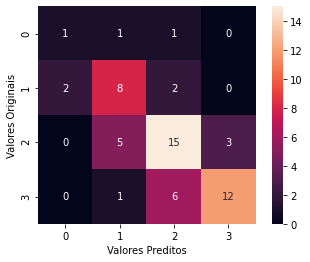

In [0]:
import matplotlib.pyplot as plt

sns.heatmap(matriz_dt, square=True, annot=True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Originais')

Text(83.40000000000006, 0.5, 'Valors Originais')

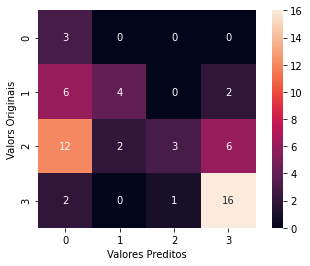

In [0]:
#nayve bayes
matriz_nb = confusion_matrix(ytest, model2_nb)

sns.heatmap(matriz_nb, square=True, annot=True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valors Originais')

## Cross-Validation


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import  KNeighborsClassifier

#define quantos vizinhos de cada lado quer verificar
model_cv = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model_cv, X_development, y_development, cv = 5)

array([0.33333333, 0.37777778, 0.4       , 0.48888889, 0.44444444])

In [0]:
model_nb_cv = GaussianNB()
cross_val_score(model_nb_cv, X_development, y_development, cv = 5)

array([0.35555556, 0.37777778, 0.4       , 0.37777778, 0.48888889])

### Leave One Out

In [0]:
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model_nb_cv, X_development, y_development, cv=LeaveOneOut())

In [0]:
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [0]:
scores.mean()

0.4